In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scienceplots
from itertools import zip_longest
import pandas as pd
from scipy import stats

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    'font.size': 20,         #Tamaño de fuente general
    'axes.titlesize': 20,    #Tamaño de fuente para títulos de ejes
    'axes.labelsize': 20,    #Tamaño de fuente para etiquetas de ejes
    'xtick.labelsize': 20,   #Tamaño de fuente para etiquetas del eje x
    'ytick.labelsize': 20,   #Tamaño de fuente para etiquetas del eje y
    'legend.fontsize': 15,   #Tamaño de fuente para la leyenda
    'figure.titlesize': 20   #Tamaño de fuente para el título de la figura
})

plt.style.use(['science', 'grid'])

In [2]:
#leyendo el archivo
file_name_tng300 = 'Table_TNG300_snapshot99_ALL_NEWVERSION.hdf5'
tng300_file = h5py.File(file_name_tng300, 'r')
print('---------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Llaves del archivo: ', list(tng300_file.keys()))
print('---------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Llaves de Groups: ', list(tng300_file['Groups'].keys()))
print('---------------------------------------------------------------------------------------------------------------------------------------------------------')
print('Llaves de SubGroups: ', list(tng300_file['SubGroups'].keys()))
print('---------------------------------------------------------------------------------------------------------------------------------------------------------')

---------------------------------------------------------------------------------------------------------------------------------------------------------
Llaves del archivo:  ['Groups', 'SubGroups']
---------------------------------------------------------------------------------------------------------------------------------------------------------
Llaves de Groups:  ['GrNr_halo', 'GroupPos', 'Group_M_Crit200', 'Spin', 'c200', 'zform']
---------------------------------------------------------------------------------------------------------------------------------------------------------
Llaves de SubGroups:  ['SubhaloCM', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloMassInHalfRadType', 'SubhaloMassType', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSFRinHalfRad', 'SubhaloStellarPhotometrics_g', 'SubhaloStellarPhotometrics_i', 'SubhaloStellarPhotometrics_r', 'SubhaloStellarPhotometrics_z', 'SubhaloVel', 'SubhaloVelDisp', 'SubhaloVmax', 'SubhaloVmaxRad', 'arrayIDGroup'

In [3]:
#extrayendo las variables del archivo como arrays individuales
#de Groups
GrNr_halo = np.asarray(tng300_file['Groups/GrNr_halo'])
GroupPos = np.asarray(tng300_file['Groups/GroupPos'])
Group_M_Crit200 = np.asarray(tng300_file['Groups/Group_M_Crit200'])
Spin = np.asarray(tng300_file['Groups/Spin'])
c200 = np.asarray(tng300_file['Groups/c200'])
zform = np.asarray(tng300_file['Groups/zform'])

#eliminando halos donde dm_mass = 0
SubhaloMassType = np.asarray(tng300_file['SubGroups/SubhaloMassType'])
dm_subhmass = SubhaloMassType[:,1]
pos_fixed_bad_subh = np.where(dm_subhmass > 10**9)[0]
print('Eliminamos valores dónde la masa de DM del subhalo fuera igual a 0 y en donde fuera menor a 10**(9), por el fuerte decaimiento de la Halo Mass Function')
print('Eliminamos '+str(round((1 - len(pos_fixed_bad_subh)/len(SubhaloMassType)) * 100, 2))+'% de la muestra disponible.')

#de SubGroups
SubhaloCM = np.asarray(tng300_file['SubGroups/SubhaloCM'])[pos_fixed_bad_subh]
SubhaloGrNr = np.asarray(tng300_file['SubGroups/SubhaloGrNr'])[pos_fixed_bad_subh]
SubhaloHalfmassRad = np.asarray(tng300_file['SubGroups/SubhaloHalfmassRad'])[pos_fixed_bad_subh]
SubhaloHalfmassRadType = np.asarray(tng300_file['SubGroups/SubhaloHalfmassRadType'])[pos_fixed_bad_subh]
SubhaloMassInHalfRadType = np.asarray(tng300_file['SubGroups/SubhaloMassInHalfRadType'])[pos_fixed_bad_subh]
SubhaloMassType = np.asarray(tng300_file['SubGroups/SubhaloMassType'])[pos_fixed_bad_subh]
gas_subhmass = SubhaloMassType[:,0]
dm_subhmass = SubhaloMassType[:,1]
stellar_subhmass = SubhaloMassType[:,4]
SubhaloPos = np.asarray(tng300_file['SubGroups/SubhaloPos'])[pos_fixed_bad_subh]
subh_posx = SubhaloPos[:,0]
subh_posy = SubhaloPos[:,1]
subh_posz = SubhaloPos[:,2]
SubhaloSFR = np.asarray(tng300_file['SubGroups/SubhaloSFR'])[pos_fixed_bad_subh]
SubhaloSFRinHalfRad = np.asarray(tng300_file['SubGroups/SubhaloSFRinHalfRad'])[pos_fixed_bad_subh]
SubhaloStellarPhotometrics_g = np.asarray(tng300_file['SubGroups/SubhaloStellarPhotometrics_g'])[pos_fixed_bad_subh]
SubhaloStellarPhotometrics_i = np.asarray(tng300_file['SubGroups/SubhaloStellarPhotometrics_i'])[pos_fixed_bad_subh]
SubhaloStellarPhotometrics_r = np.asarray(tng300_file['SubGroups/SubhaloStellarPhotometrics_r'])[pos_fixed_bad_subh]
SubhaloStellarPhotometrics_z = np.asarray(tng300_file['SubGroups/SubhaloStellarPhotometrics_z'])[pos_fixed_bad_subh]
SubhaloVel = np.asarray(tng300_file['SubGroups/SubhaloVel'])[pos_fixed_bad_subh]
SubhaloVelDisp = np.asarray(tng300_file['SubGroups/SubhaloVelDisp'])[pos_fixed_bad_subh]
SubhaloVmax = np.asarray(tng300_file['SubGroups/SubhaloVmax'])[pos_fixed_bad_subh]
SubhaloVmaxRad = np.asarray(tng300_file['SubGroups/SubhaloVmaxRad'])[pos_fixed_bad_subh]
arrayIDGroup = np.asarray(tng300_file['SubGroups/arrayIDGroup'])[pos_fixed_bad_subh]

Eliminamos valores dónde la masa de DM del subhalo fuera igual a 0 y en donde fuera menor a 10**(9), por el fuerte decaimiento de la Halo Mass Function
Eliminamos 13.76% de la muestra disponible.


Realizamos un corte en la masa del catálogo para halos de masa menores a 10**(9), por el fuerte decrecimiento en la halo mass function (no son datos confiables):


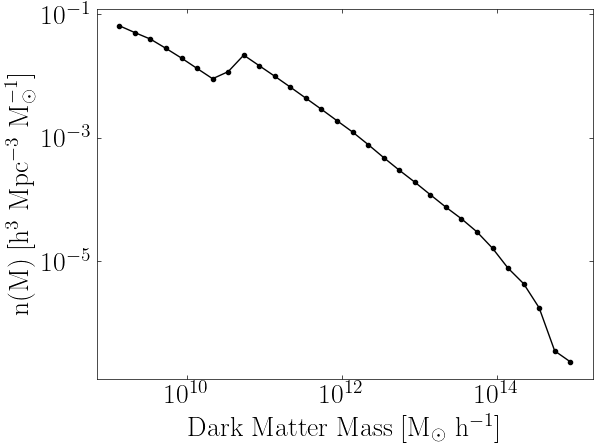

In [4]:
#vamos a realizar un corte en la masa, segun la halo mass function
print('Realizamos un corte en la masa del catálogo para halos de masa menores a 10**(9), por el fuerte decrecimiento en la halo mass function (no son datos confiables):')
vol_box_sim = 205**3 #volumen caja en unidades de [Mpc**(3)*h**(-1)]

fig = plt.figure(figsize = (6.4,4.8))
ax = fig.subplots()
N = 30
log_bins = np.logspace(np.log10(np.min(dm_subhmass)), np.log10(np.max(dm_subhmass)), N + 1)
hist, bins = np.histogram(dm_subhmass, bins = log_bins)
prom_bins = (bins[1:] + bins[:-1])/2
ax.plot(prom_bins, hist/vol_box_sim, color = 'black', marker = '.')

ax.set_xlabel(r'Dark Matter Mass [M$_{\odot}$ h$^{-1}$]')
ax.set_ylabel(r'n(M) [h$^3$ Mpc$^{-3}$ M$_{\odot}^{-1}$]')
ax.set_yscale('log')
ax.set_xscale('log')
ax.grid(False)
#fig.savefig('images/halo_mass_function.png', dpi = 600)
plt.show()

Pregunta 2

In [5]:
#Para crear el array centrales = 1 y satelites = 0
central, pos_cen, subh_per_halo = np.unique(SubhaloGrNr, return_index = True, return_counts = True)
cen1_sat0 = np.zeros(len(SubhaloGrNr))
cen1_sat0[pos_cen] = 1

In [6]:
#definiendo subhalos centrales, satélites y todo el sample
subh_sat_per_halo = subh_per_halo - 1
subh_cen_per_halo = subh_per_halo - subh_sat_per_halo
subh_all_per_halo = subh_per_halo

In [7]:
#criterio de masa estelar, para considerar cuando hay una galaxia y cuando no
pos_central_subh = np.where(cen1_sat0 == 1)[0]
pos_sat_subh = np.where(cen1_sat0 == 0)[0]
stellar_mass_cen = stellar_subhmass[pos_central_subh]
stellar_mass_sat = stellar_subhmass[pos_sat_subh]
no_stellar_mass_cen = np.where(stellar_mass_cen <= 10**9)[0]
no_stellar_mass_sat = np.where(stellar_mass_sat <= 10**9)[0]
no_stellar_mass_all = np.where(stellar_subhmass <= 10**9)[0]
#dónde si se cumple el criterio
si_stellar_mass_cen = np.where(stellar_mass_cen > 10**9)[0]
si_stellar_mass_sat = np.where(stellar_mass_sat > 10**9)[0]
si_stellar_mass_all = np.where(stellar_subhmass > 10**9)[0]

In [8]:
#aplicando criterio de la masa estelar para centrales, satélites y todo el sample
#para galaxias centrales
no_mass_group_number_cen = SubhaloGrNr[pos_central_subh][no_stellar_mass_cen]
ids_group_cen_no_mass, _, subh_per_halo_cen_no_mass = np.unique(no_mass_group_number_cen, return_index = True, return_counts = True)
eq_index_cen, pos_cennomass_in_halo, pos_no_mass_cen = np.intersect1d(GrNr_halo, ids_group_cen_no_mass, return_indices = True)
subh_cen_per_halo[pos_cennomass_in_halo] -= subh_per_halo_cen_no_mass
#para galaxias satélites
no_mass_group_number_sat = SubhaloGrNr[pos_sat_subh][no_stellar_mass_sat]
ids_group_sat_no_mass, _, subh_per_halo_sat_no_mass = np.unique(no_mass_group_number_sat, return_index = True, return_counts = True)
eq_index_sat, pos_satnomass_in_halo, pos_no_mass_sat = np.intersect1d(GrNr_halo, ids_group_sat_no_mass, return_indices = True)
subh_sat_per_halo[pos_satnomass_in_halo] -= subh_per_halo_sat_no_mass
#para todo el sample
no_mass_group_number_all = SubhaloGrNr[no_stellar_mass_all]
ids_group_all_no_mass, _, subh_per_halo_all_no_mass = np.unique(no_mass_group_number_all, return_index = True, return_counts = True)
eq_index_all, pos_allnomass_in_halo, pos_no_mass_all = np.intersect1d(GrNr_halo, ids_group_all_no_mass, return_indices = True)
subh_all_per_halo[pos_allnomass_in_halo] -= subh_per_halo_all_no_mass

In [9]:
#creando variables del array de galaxias por halos considerando el criterio de masa
gal_per_halo_cen = subh_cen_per_halo
gal_per_halo_sat = subh_sat_per_halo
gal_per_halo_all = subh_all_per_halo

In [10]:
#para realizar el HOD por bin de masa
dm_halo_mass = Group_M_Crit200
all_sample_HOD = gal_per_halo_all
sat_HOD = gal_per_halo_sat
cen_HOD = gal_per_halo_cen
N = 15 #numero de bins
#definir bins
bins_dm_halo = np.logspace(np.log10(min(dm_halo_mass)), np.log10(max(dm_halo_mass)), N + 1 ) 

#calcular el promedio de all_sample_HOD por bin de masa
HOD_per_bins, bin_edges, binnumber = stats.binned_statistic(dm_halo_mass, all_sample_HOD, statistic='mean', bins=bins_dm_halo)

#calcular el promedio de sat_HOD por bin de masa
HOD_per_bins_sat, bin_edges_sat, binnumber = stats.binned_statistic(dm_halo_mass, sat_HOD, statistic='mean', bins=bins_dm_halo)

#calcular el promedio de cen_HOD por bin de masa
HOD_per_bins_cen, bin_edges_cen, binnumber = stats.binned_statistic(dm_halo_mass, cen_HOD, statistic='mean', bins=bins_dm_halo)

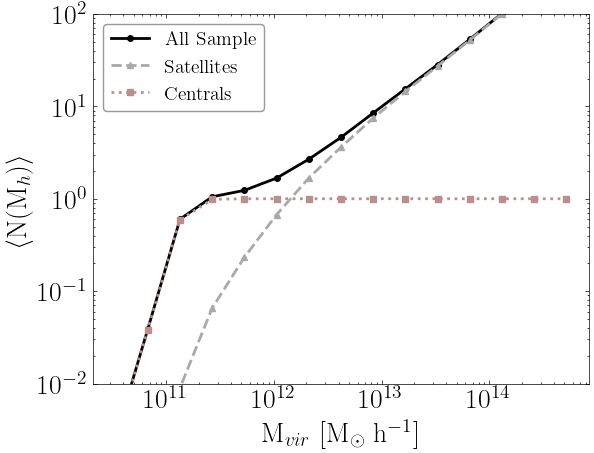

In [29]:
fig = plt.figure(figsize = (6.4,4.8))
ax = fig.subplots()
ax.plot(bin_edges[:-1], HOD_per_bins, label = 'All Sample', color = 'black', lw = 2, zorder = 1, marker = 'o', ms = 4)
ax.plot(bin_edges_sat[:-1], HOD_per_bins_sat, label = 'Satellites', color = 'darkgray', lw = 2, ls = '--', zorder = 2, marker = '^', ms = 4)
ax.plot(bin_edges_cen[:-1], HOD_per_bins_cen, label = 'Centrals', color = 'rosybrown', lw = 2, ls = ':', zorder = 3, marker = 's', ms = 4)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'M$_{vir}$ [M$_{\odot}$ h$^{-1}$]')
ax.set_ylabel(r'$\langle$N(M$_h$)$\rangle$')
ax.legend(framealpha = 0.4, edgecolor = (0,0,0,1), fontsize = 14)
#ax.set_xlim(bin_edges[:-1].min()/10, bin_edges[:-1].max())
ax.set_ylim(10**(-2), 10**2)
ax.grid(False)
fig.savefig('images/HOD_cen_sat_all.png', dpi = 600)
plt.show()

In [12]:
#Realizando un corte por color, definimos g-r = 0.6 como el threshold para separar azules y rojas, considerando solamente aquellas galaxias que tienen 
#masa estelar > 10**9
g_r_cen = (SubhaloStellarPhotometrics_g - SubhaloStellarPhotometrics_r)[pos_central_subh][si_stellar_mass_cen]
g_r_sat = (SubhaloStellarPhotometrics_g - SubhaloStellarPhotometrics_r)[pos_sat_subh][si_stellar_mass_sat]
g_r_all = (SubhaloStellarPhotometrics_g - SubhaloStellarPhotometrics_r)[si_stellar_mass_all]

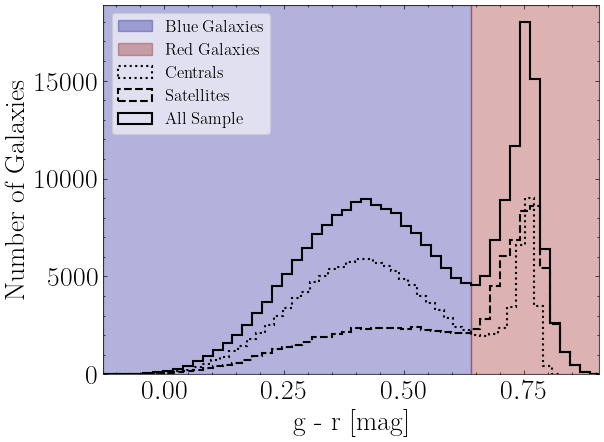

In [13]:
#histograma para conocer la separación natural de color, en centrales, satélites y todo el Sample
fig= plt.figure(figsize=(6.4,4.8))
ax = fig.subplots()
ax.axvspan(np.min(g_r_all), 0.64, color='darkblue', alpha=0.3, lw=1, label = 'Blue Galaxies', zorder = 1)
ax.axvspan(0.64, np.max(g_r_all), color='darkred', alpha=0.3, lw=1, label = 'Red Galaxies', zorder = 1)
ax.hist(g_r_cen, bins = 50, histtype = "step", color = 'black', lw = 1.5, label = 'Centrals', zorder = 3, ls = ':')
ax.hist(g_r_sat, bins = 50, histtype = "step", color = 'black', lw = 1.5, label = 'Satellites', zorder = 3, ls = '--')
ax.hist(g_r_all, bins = 50, histtype = "step", color = 'black', lw = 1.5, label = 'All Sample', zorder = 2)

ax.legend(framealpha = 0.6, fontsize = 12, loc = 'upper left')
ax.set_xlim(np.min(g_r_all), np.max(g_r_all))
ax.set_xlabel(r'g - r [mag]')
ax.set_ylabel('Number of Galaxies')
ax.grid(False)
#fig.savefig('images/color_hist_cen_sat_all.png', dpi = 600)
plt.show()

In [14]:
#galaxias rojas separadas por centrales, satélites y todo el sample
pos_red_gal_cen = np.where(g_r_cen >= 0.64)[0]
pos_red_gal_sat = np.where(g_r_sat >= 0.64)[0]
pos_red_gal_all = np.where(g_r_all >= 0.64)[0]
#galaxias azules separadas por centrales, satélites y todo el sample
pos_blue_gal_cen = np.where(g_r_cen < 0.64)[0]
pos_blue_gal_sat = np.where(g_r_sat < 0.64)[0]
pos_blue_gal_all = np.where(g_r_all < 0.64)[0]

In [15]:
#primero para galaxias rojas

In [16]:
#creando variables del array de galaxias por halos considerando el criterio de masa
gal_per_halo_cen_red = np.load('arrays/gal_per_halo_cen.npy')
gal_per_halo_sat_red = np.load('arrays/gal_per_halo_sat.npy')
gal_per_halo_all_red = np.load('arrays/gal_per_halo_all.npy')

In [17]:
#Separando por colores para centrales, satélites y todo el sample
#Para galaxias centrales azules
blue_gal_group_number_cen = SubhaloGrNr[pos_central_subh][si_stellar_mass_cen][pos_blue_gal_cen]
ids_group_cen_blue, _, subh_per_halo_cen_blue = np.unique(blue_gal_group_number_cen, return_index = True, return_counts = True)
eq_index_cen_blue, pos_cenblue_in_halo, pos_blue_cen = np.intersect1d(GrNr_halo, ids_group_cen_blue, return_indices = True)
gal_per_halo_cen_red[pos_cenblue_in_halo] -= subh_per_halo_cen_blue
#Para galaxias satélites azules
blue_gal_group_number_sat = SubhaloGrNr[pos_sat_subh][si_stellar_mass_sat][pos_blue_gal_sat]
ids_group_sat_blue, _, subh_per_halo_sat_blue = np.unique(blue_gal_group_number_sat, return_index = True, return_counts = True)
eq_index_sat_blue, pos_satblue_in_halo, pos_blue_sat = np.intersect1d(GrNr_halo, ids_group_sat_blue, return_indices = True)
gal_per_halo_sat_red[pos_satblue_in_halo] -= subh_per_halo_sat_blue
#para todo el sample azules
blue_gal_group_number_all = SubhaloGrNr[si_stellar_mass_all][pos_blue_gal_all]
ids_group_all_blue, _, subh_per_halo_all_blue = np.unique(blue_gal_group_number_all, return_index = True, return_counts = True)
eq_index_all_blue, pos_allblue_in_halo, pos_blue_all = np.intersect1d(GrNr_halo, ids_group_all_blue, return_indices = True)
gal_per_halo_all_red[pos_allblue_in_halo] -= subh_per_halo_all_blue

In [18]:
#creando variables del array de galaxias por halo, para centrales, sat y todo el sample para rojas
gal_per_halo_cen_reds = gal_per_halo_cen_red
gal_per_halo_sat_reds = gal_per_halo_sat_red
gal_per_halo_all_reds = gal_per_halo_all_red

In [19]:
#para realizar el HOD por bin de masa
dm_halo_mass = Group_M_Crit200
cen_HOD_red = gal_per_halo_cen_red
sat_HOD_red = gal_per_halo_sat_reds
all_sample_HOD_red = gal_per_halo_all_reds
N = 15 #numero de bins
#definir bins
bins_dm_halo = np.logspace(np.log10(min(dm_halo_mass)), np.log10(max(dm_halo_mass)), N + 1 ) 

#calcular el promedio de all_sample_HOD por bin de masa
HOD_per_bins_red, bin_edges_red, _ = stats.binned_statistic(dm_halo_mass, all_sample_HOD_red, statistic='mean', bins=bins_dm_halo)

#calcular el promedio de sat_HOD por bin de masa
HOD_per_bins_sat_red, bin_edges_sat_red, _ = stats.binned_statistic(dm_halo_mass, sat_HOD_red, statistic='mean', bins=bins_dm_halo)

#calcular el promedio de cen_HOD por bin de masa
HOD_per_bins_cen_red, bin_edges_cen_red, _ = stats.binned_statistic(dm_halo_mass, cen_HOD_red, statistic='mean', bins=bins_dm_halo)

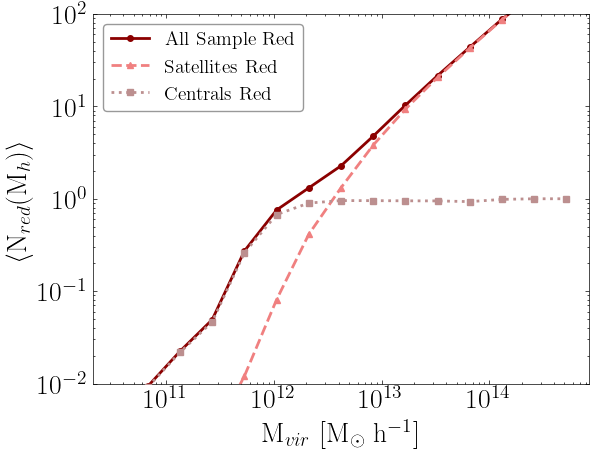

In [21]:
fig = plt.figure(figsize = (6.4,4.8))
ax = fig.subplots()
ax.plot(bin_edges_red[:-1], HOD_per_bins_red, label = 'All Sample Red', color = 'darkred', lw = 2, zorder = 1, marker = 'o', ms = 4)
ax.plot(bin_edges_sat_red[:-1], HOD_per_bins_sat_red, label = 'Satellites Red', color = 'lightcoral', lw = 2, ls = '--', zorder = 2, marker = '^', ms = 4)
ax.plot(bin_edges_cen_red[:-1], HOD_per_bins_cen_red, label = 'Centrals Red', color = 'rosybrown', lw = 2, ls = ':', zorder = 3, marker = 's', ms = 4)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'M$_{vir}$ [M$_{\odot}$ h$^{-1}$]')
ax.set_ylabel(r'$\langle$N$_{red}$(M$_h$)$\rangle$')
ax.legend(framealpha = 0.4, edgecolor = (0,0,0,1), fontsize = 14)
#ax.set_xlim(bin_edges[:-1].min()/10, bin_edges[:-1].max())
ax.set_ylim(10**(-2), 10**2)
ax.grid(False)
fig.savefig('images/HOD_cen_sat_all_red.png', dpi = 600)
plt.show()

In [22]:
#ahora para galaxias azules

In [23]:
#creando variables del array de galaxias por halos considerando el criterio de masa
gal_per_halo_cen_blue = np.load('arrays/gal_per_halo_cen.npy')
gal_per_halo_sat_blue = np.load('arrays/gal_per_halo_sat.npy')
gal_per_halo_all_blue = np.load('arrays/gal_per_halo_all.npy')

In [24]:
#Para galaxias centrales rojas
red_gal_group_number_cen = SubhaloGrNr[pos_central_subh][si_stellar_mass_cen][pos_red_gal_cen]
ids_group_cen_red, _, subh_per_halo_cen_red = np.unique(red_gal_group_number_cen, return_index = True, return_counts = True)
eq_index_cen_red, pos_cenred_in_halo, pos_red_cen = np.intersect1d(GrNr_halo, ids_group_cen_red, return_indices = True)
gal_per_halo_cen_blue[pos_cenred_in_halo] -= subh_per_halo_cen_red
#Para galaxias satélites rojas
red_gal_group_number_sat = SubhaloGrNr[pos_sat_subh][si_stellar_mass_sat][pos_red_gal_sat]
ids_group_sat_red, _, subh_per_halo_sat_red = np.unique(red_gal_group_number_sat, return_index = True, return_counts = True)
eq_index_sat_red, pos_satred_in_halo, pos_red_sat = np.intersect1d(GrNr_halo, ids_group_sat_red, return_indices = True)
gal_per_halo_sat_blue[pos_satred_in_halo] -= subh_per_halo_sat_red
#para todo el sample rojas
red_gal_group_number_all = SubhaloGrNr[si_stellar_mass_all][pos_red_gal_all]
ids_group_all_red, _, subh_per_halo_all_red = np.unique(red_gal_group_number_all, return_index = True, return_counts = True)
eq_index_all_red, pos_allred_in_halo, pos_red_all = np.intersect1d(GrNr_halo, ids_group_all_red, return_indices = True)
gal_per_halo_all_blue[pos_allred_in_halo] -= subh_per_halo_all_red

In [25]:
#creando variables del array de galaxias por halo, para centrales, sat y todo el sample para azules
gal_per_halo_cen_bluer = gal_per_halo_cen_blue
gal_per_halo_sat_bluer = gal_per_halo_sat_blue
gal_per_halo_all_bluer = gal_per_halo_all_blue

In [26]:
#para realizar el HOD por bin de masa
dm_halo_mass = Group_M_Crit200
cen_HOD_blue = gal_per_halo_cen_bluer
sat_HOD_blue = gal_per_halo_sat_bluer
all_sample_HOD_blue = gal_per_halo_all_bluer
N = 15 #numero de bins
#definir bins
bins_dm_halo = np.logspace(np.log10(min(dm_halo_mass)), np.log10(max(dm_halo_mass)), N + 1 ) 

#calcular el promedio de all_sample_HOD por bin de masa
HOD_per_bins_blue, bin_edges_blue, _ = stats.binned_statistic(dm_halo_mass, all_sample_HOD_blue, statistic='mean', bins=bins_dm_halo)

#calcular el promedio de sat_HOD por bin de masa
HOD_per_bins_sat_blue, bin_edges_sat_blue, _ = stats.binned_statistic(dm_halo_mass, sat_HOD_blue, statistic='mean', bins=bins_dm_halo)

#calcular el promedio de cen_HOD por bin de masa
HOD_per_bins_cen_blue, bin_edges_cen_blue, _ = stats.binned_statistic(dm_halo_mass, cen_HOD_blue, statistic='mean', bins=bins_dm_halo)

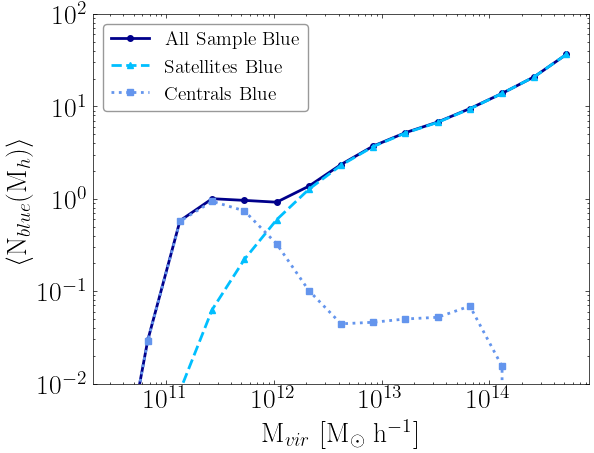

In [27]:
fig = plt.figure(figsize = (6.4,4.8))
ax = fig.subplots()
ax.plot(bin_edges_blue[:-1], HOD_per_bins_blue, label = 'All Sample Blue', color = 'darkblue', lw = 2, zorder = 1, marker = 'o', ms = 4)
ax.plot(bin_edges_sat_blue[:-1], HOD_per_bins_sat_blue, label = 'Satellites Blue', color = 'deepskyblue', lw = 2, ls = '--', zorder = 2, marker = '^', ms = 4)
ax.plot(bin_edges_cen_blue[:-1], HOD_per_bins_cen_blue, label = 'Centrals Blue', color = 'cornflowerblue', lw = 2, ls = ':', zorder = 3, marker = 's', ms = 4)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'M$_{vir}$ [M$_{\odot}$ h$^{-1}$]')
ax.set_ylabel(r'$\langle$N$_{blue}$(M$_h$)$\rangle$')
ax.legend(framealpha = 0.4, edgecolor = (0,0,0,1), fontsize = 14)
#ax.set_xlim(bin_edges[:-1].min()/10, bin_edges[:-1].max())
ax.set_ylim(10**(-2), 10**2)
ax.grid(False)
fig.savefig('images/HOD_cen_sat_all_blue.png', dpi = 600)
plt.show()

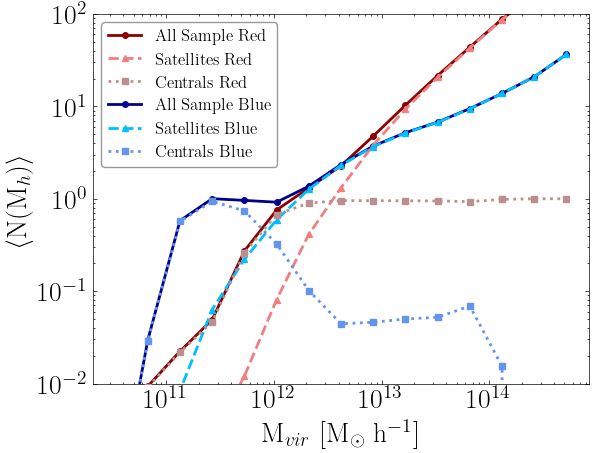

In [28]:
#Plot del HOD para ambos colores juntos
fig = plt.figure(figsize = (6.4,4.8))
ax = fig.subplots()

ax.plot(bin_edges_red[:-1], HOD_per_bins_red, label = 'All Sample Red', color = 'darkred', lw = 2, zorder = 1, marker = 'o', ms = 4)
ax.plot(bin_edges_sat_red[:-1], HOD_per_bins_sat_red, label = 'Satellites Red', color = 'lightcoral', lw = 2, ls = '--', zorder = 2, marker = '^', ms = 4)
ax.plot(bin_edges_cen_red[:-1], HOD_per_bins_cen_red, label = 'Centrals Red', color = 'rosybrown', lw = 2, ls = ':', zorder = 3, marker = 's', ms = 4)

ax.plot(bin_edges_blue[:-1], HOD_per_bins_blue, label = 'All Sample Blue', color = 'darkblue', lw = 2, zorder = 1, marker = 'o', ms = 4)
ax.plot(bin_edges_sat_blue[:-1], HOD_per_bins_sat_blue, label = 'Satellites Blue', color = 'deepskyblue', lw = 2, ls = '--', zorder = 2, marker = '^', ms = 4)
ax.plot(bin_edges_cen_blue[:-1], HOD_per_bins_cen_blue, label = 'Centrals Blue', color = 'cornflowerblue', lw = 2, ls = ':', zorder = 3, marker = 's', ms = 4)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'M$_{vir}$ [M$_{\odot}$ h$^{-1}$]')
ax.set_ylabel(r'$\langle$N(M$_h$)$\rangle$')
ax.legend(framealpha = 0.4, edgecolor = (0,0,0,1), fontsize = 12)
#ax.set_xlim(bin_edges[:-1].min()/10, bin_edges[:-1].max())
ax.set_ylim(10**(-2), 10**2)
ax.grid(False)
fig.savefig('images/HOD_cen_sat_all_red_and_blue.png', dpi = 600)
plt.show()